In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import FITS_tools
from astropy.io import fits
import astropy.wcs as pywcs
import sep
import pyregion
%matplotlib inline

# Center PHAT data

In [2]:
def load_from_fits(f):
    hdu_list = fits.open(f)
    im = hdu_list['sci'].data
    h = hdu_list['sci'].header
    wcs = pywcs.WCS(h, fobj=hdu_list)
    wcs.naxis2 = h['naxis2']
    wcs.naxis1 = h['naxis1']
    return im, h, wcs

In [3]:
def update_header(h1, h2):
    h3 = h1.copy()
    for k in ['NAXIS1', 'NAXIS2', 'CRPIX1', 'CRPIX2', 'CRVAL1', 'CRVAL2', 
             'CD1_1', 'CD1_2', 'CD2_1', 'CD2_2', 'ORIENTAT', 'RA_APER', 'DEC_APER']:
        h3[k] = h2[k]
    return h2

In [4]:
def shift_fits(file_1, file_2, output_file=None):
    im1, h1, wcs1 = load_from_fits(file_1)
    im2, h2, wcs2 = load_from_fits(file_2)
    print('beginning transformation')
    new_im = FITS_tools.hcongrid.hastrom(im1, wcs1, wcs2, preserve_bad_pixels=True)
    print('transformation complete')
    new_h = update_header(h1, h2)
    hdu = fits.ImageHDU(data=new_im, header=new_h)
    if output_file is not None:
        print('saving result')
        hdu.writeto(output_file)
    return hdu

In [ ]:
%%time
shift_fits('../data/m31/raw/hlsp_phat_hst_acs-wfc_12058-m31-b01_f475w_v1_drz.fits',
           '../data/m31/raw/hlsp_phat_hst_acs-wfc_12058-m31-b01_f814w_v1_drz.fits',
        output_file='../data/m31/raw/hlsp_phat_hst_acs-wfc_12058-m31-b01_f475w_v1_drz_ALIGNED.fits')

beginning transformation


KeyboardInterrupt: 

In [ ]:
%%time
shift_fits('../data/m31/raw/hlsp_phat_hst_acs-wfc_12105-m31-b06_f475w_v1_drz.fits',
           '../data/m31/raw/hlsp_phat_hst_acs-wfc_12105-m31-b06_f814w_v1_drz.fits',
        output_file='../data/m31/raw/hlsp_phat_hst_acs-wfc_12105-m31-b06_f475w_v1_drz_ALIGNED.fits')

beginning transformation


# Load a small m31 region

In [ ]:
f814w = fits.open('../data/m31/raw/hlsp_phat_hst_acs-wfc_12058-m31-b01_f814w_v1_drz.fits')
f475w = fits.open('../data/m31/raw/hlsp_phat_hst_acs-wfc_12058-m31-b01_f475w_v1_drz_ALIGNED.fits')

In [ ]:
regions = pyregion.open('../data/m31/masks/bulge_square.reg').as_imagecoord(header=f814w[0].header)

In [ ]:
mask = regions.get_mask(shape=f814w['SCI'].shape)

In [ ]:
xs, ys = np.where(mask)
im_f475w = f475w['sci'].data[mask].reshape((len(np.unique(xs)), len(np.unique(ys))))
im_f814w = f814w['sci'].data[mask].reshape((len(np.unique(xs)), len(np.unique(ys))))

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
axes[0].imshow(im_f475w, cmap='Greys_r'), axes[1].imshow(im_f814w, cmap='Greys_r')
axes[0].set_title('F475W'), axes[1].set_title('F814W')

In [ ]:
hdulist = fits.HDUList([
    fits.PrimaryHDU(),
    fits.ImageHDU(data=im_f475w, header=f475w[0].header, name='SCI,1'),
    fits.ImageHDU(data=im_f814w, header=f814w[0].header, name='SCI,2'),
])

In [ ]:
hdulist.writeto('../data/m31/raw/bulge_tiny_both.fits')

# Load small m49 regions

In [2]:
f850lp = fits.open('../data/m49/reduced/m49_chip1_exp1_f850lp_reduced.fits')
f475w = fits.open('../data/m49/reduced/m49_chip1_exp1_f475w_reduced.fits')
regions = pyregion.open('../data/m49/masks/square.reg').as_imagecoord(header=f850lp[0].header)
mask = regions.get_mask(shape=f850lp['SCI'].shape)

In [3]:
xs, ys = np.where(mask)
im_f475w = f475w['sci'].data[mask].reshape((len(np.unique(xs)), len(np.unique(ys))))
im_f850lp = f850lp['sci'].data[mask].reshape((len(np.unique(xs)), len(np.unique(ys))))

(Text(0.5,1,'F475W'), Text(0.5,1,'F850lp'))

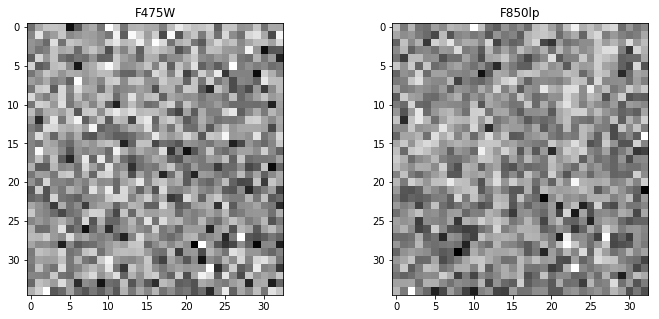

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
axes[0].imshow(im_f475w, cmap='Greys_r'), axes[1].imshow(im_f850lp, cmap='Greys_r')
axes[0].set_title('F475W'), axes[1].set_title('F850lp')

In [6]:
hdulist = fits.HDUList([
    fits.PrimaryHDU(),
    fits.ImageHDU(data=im_f475w, header=f475w[0].header, name='SCI,1'),
    fits.ImageHDU(data=im_f850lp, header=f850lp[0].header, name='SCI,2'),
])
hdulist.writeto('../data/m49/raw/oneexp_tiny_both.fits', overwrite=True)

# Load drizzled m49 regions and save

In [17]:
f850lp = fits.open('../data/m49/reduced/m49_f850lp_drc.fits')
f475w = fits.open('../data/m49/reduced/m49_f475w_drc.fits')
regions = pyregion.open('../data/m49/masks/square_drc.reg').as_imagecoord(header=f475w[1].header)


mask = regions.get_mask(shape=f850lp['SCI'].shape)
xy, ys = np.where(mask)
im_f850lp = f850lp['sci'].data[mask].reshape((len(np.unique(xs)), len(np.unique(ys))))

mask = regions.get_mask(shape=f475w['SCI'].shape)
xy, ys = np.where(mask)
im_f475w = f475w['sci'].data[mask].reshape((len(np.unique(xs)), len(np.unique(ys))))


(Text(0.5,1,'F475W (Drizzled)'), Text(0.5,1,'F850lp (Drizzled)'))

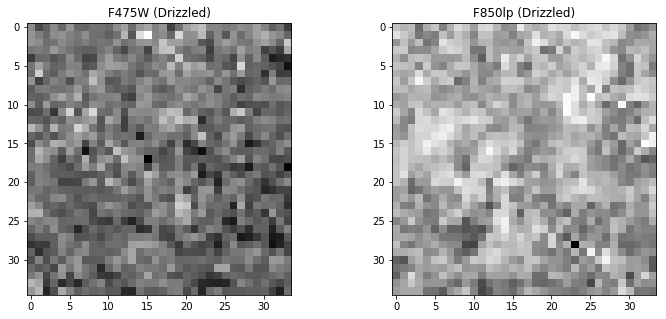

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
axes[0].imshow(im_f475w, cmap='Greys_r'), axes[1].imshow(im_f850lp, cmap='Greys_r')
axes[0].set_title('F475W (Drizzled)'), axes[1].set_title('F850lp (Drizzled)')

In [20]:
hdulist = fits.HDUList([
    fits.PrimaryHDU(),
    fits.ImageHDU(data=im_f475w, header=f475w[0].header, name='SCI,1'),
    fits.ImageHDU(data=im_f850lp, header=f850lp[0].header, name='SCI,2'),
])
hdulist.writeto('../data/m49/raw/drizzled_tiny_both.fits', overwrite=True)